In [14]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from numpy.polynomial.hermite import hermgauss

In [15]:
def f(x):
    return 1.0 / np.sqrt(x**2 + 1.0)

exact = 2.0 * np.arcsinh(1.0) # computes the exact integral using arcsinh

def midpoint_rule(f, a, b, n):
    h = (b - a) / n                  # width of each panel
    midpoints = a + (np.arange(n) + 0.5) * h
    return h * np.sum(f(midpoints))

def trapezoid_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    return h * (0.5*f(x[0]) + np.sum(f(x[1:-1])) + 0.5*f(x[-1]))

a, b = -1.0, 1.0
n = 51

mid_est = midpoint_rule(f, a, b, n)
trap_est = trapezoid_rule(f, a, b, n)

mid_error = mid_est - exact
trap_error = trap_est - exact

print("Exact value:             ", exact)
print("Midpoint estimate:       ", mid_est)
print("Midpoint error:          ", mid_error)
print()
print("Trapezoid estimate:      ", trap_est)
print("Trapezoid error:         ", trap_error)

Exact value:              1.762747174039086
Midpoint estimate:        1.7627924854929113
Midpoint error:           4.531145382524748e-05

Trapezoid estimate:       1.7626565524366788
Trapezoid error:          -9.062160240724815e-05


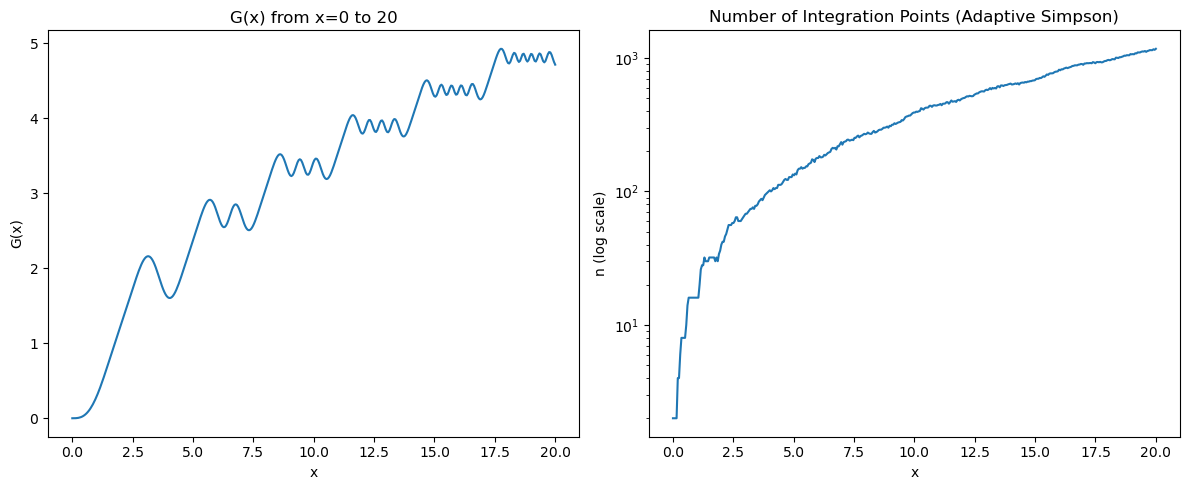

First 20 minima of G(x):
 1:  x = 4.01003,   G(x) = 1.6042560928
 2:  x = 6.26566,   G(x) = 2.5482754314
 3:  x = 7.31830,   G(x) = 2.5074975790
 4:  x = 9.07268,   G(x) = 3.2299002403
 5:  x = 9.77444,   G(x) = 3.2481638249
 6:  x = 10.52632,   G(x) = 3.1900905468
 7:  x = 12.03008,   G(x) = 3.7961206914
 8:  x = 12.58145,   G(x) = 3.8179307443
 9:  x = 13.08271,   G(x) = 3.8139080372
10:  x = 13.73434,   G(x) = 3.7576346539
11:  x = 15.03759,   G(x) = 4.2882545371
12:  x = 15.48872,   G(x) = 4.3113280068
13:  x = 15.88972,   G(x) = 4.3152040981
14:  x = 16.34085,   G(x) = 4.3068380411
15:  x = 16.89223,   G(x) = 4.2524059385
16:  x = 18.09524,   G(x) = 4.7315195662
17:  x = 18.49624,   G(x) = 4.7516690144
18:  x = 18.84712,   G(x) = 4.7567148625
19:  x = 19.19799,   G(x) = 4.7575438780
20:  x = 19.54887,   G(x) = 4.7461403127


In [3]:
# this gave me some issues
def f(t):
    return np.sin(t * np.sin(t))
    
# i was having issues with simpsons method cause i was having recursion caused crashes
def adaptive_simpson_safe(f, a, b, tol=1e-8, max_iter=20000):

    from collections import deque

    def simpson(a, b):
        c = 0.5 * (a + b)
        return (b - a) * (f(a) + 4*f(c) + f(b)) / 6

    total = 0.0
    intervals_used = 0

    # queue of intervals waiting to be processed
    queue = deque()
    queue.append((a, b, simpson(a, b)))

    iterations = 0

    while queue:
        a, b, S = queue.pop()
        c = 0.5 * (a + b)

        S_left = simpson(a, c)
        S_right = simpson(c, b)

        if abs(S_left + S_right - S) < 15 * tol:
            total += S_left + S_right
            intervals_used += 2
        else:
            queue.append((a, c, S_left))
            queue.append((c, b, S_right))

        iterations += 1
        if iterations > max_iter:
            print("WARNING: max iterations reached — tolerance too small.")
            break

    return total, intervals_used

def G(x, tol=1e-8):
    return adaptive_simpson_safe(f, 0, x, tol)
    
# Compute G(x) from 0 to 20
xs = np.linspace(0, 20, 400)
G_values = []
N_values = []

for x in xs:
    val, n_steps = G(x)
    G_values.append(val)
    N_values.append(n_steps)

plt.figure(figsize=(12,5))

# Plot G(x) and number of integration points
plt.subplot(1,2,1)
plt.plot(xs, G_values)
plt.title("G(x) from x=0 to 20")
plt.xlabel("x")
plt.ylabel("G(x)")


plt.subplot(1,2,2)
plt.plot(xs, N_values)
plt.yscale("log")
plt.title("Number of Integration Points (Adaptive Simpson)")
plt.xlabel("x")
plt.ylabel("n (log scale)")

plt.tight_layout()
plt.show()

# Find first 20 minima of G(x)
G_arr = np.array(G_values)

minima_x = []
minima_val = []

# A minimum occurs when G(i-1) > G(i) < G(i+1)
for i in range(1, len(xs) - 1):
    if G_arr[i] < G_arr[i-1] and G_arr[i] < G_arr[i+1]:
        minima_x.append(xs[i])
        minima_val.append(G_arr[i])

# Take first 20 minima
minima_x = minima_x[:20]
minima_val = minima_val[:20]

print("First 20 minima of G(x):")
for i in range(len(minima_x)):
    print(f"{i+1:2d}:  x = {minima_x[i]:.5f},   G(x) = {minima_val[i]:.10f}")

In [12]:
# I had a great deal of trouble with this problem
# Compute Hermite polynomial H_n(x) using recurrence
def H(n, x):
    if n == 0:
        return 1.0
    if n == 1:
        return 2.0 * x

    H_nm2 = 1.0        # H_0
    H_nm1 = 2.0 * x    # H_1

    for k in range(2, n+1):
        H_n = 2*x*H_nm1 - 2*(k-1)*H_nm2
        H_nm2 = H_nm1
        H_nm1 = H_n

    return H_n

# Derivative of H_n(x): H'_n(x)
# Using identity:  H'_n(x) = 2n H_{n-1}(x)
def Hprime(n, x):
    return 2*n * H(n-1, x)

# Newton's method to find roots of H_n(x)
def find_roots(n):
    roots = []

    # start with some reasonable guesses
    for k in range(1, n+1):
        # approximate formula for starting guesses
        x = np.cos((4*k - 1)*np.pi / (4*n + 2)) * np.sqrt(2*n + 1)

        # Newton iteration
        for i in range(20):
            f = H(n, x)
            fp = Hprime(n, x)
            x = x - f/fp   # Newton step

        roots.append(x)

    roots.sort()
    return np.array(roots)


# Compute weights
def compute_weights(n, roots):
    weights = []
    for x in roots:
        Hp = Hprime(n, x)
        w = (2**(n-1) * math.factorial(n) * math.sqrt(math.pi)) / (Hp*Hp)
        weights.append(w)
    return np.array(weights)
    
# Full Gauss–Hermite quadrature routine
def gauss_hermite(n):
    roots = find_roots(n)
    weights = compute_weights(n, roots)
    return roots, weights

# Compare with numpy.hermgauss()
for n in [3, 5]:
    print(f"n = {n}")
    my_x, my_w = gauss_hermite(n)
    np_x, np_w = hermgauss(n)

    print("My roots:     ", my_x)
    print("NumPy roots:  ", np_x)
    print("Difference:   ", my_x - np_x)

    print("\nMy weights:   ", my_w)
    print("NumPy weights:", np_w)
    print("Difference:   ", my_w - np_w)

n = 3
My roots:      [-1.22474487  0.          1.22474487]
NumPy roots:   [-1.22474487  0.          1.22474487]
Difference:    [-2.22044605e-16  0.00000000e+00  2.22044605e-16]

My weights:    [0.07385224 0.29540898 0.07385224]
NumPy weights: [0.29540898 1.1816359  0.29540898]
Difference:    [-0.22155673 -0.88622693 -0.22155673]
n = 5
My roots:      [-2.02018287 -2.02018287  0.          2.02018287  2.02018287]
NumPy roots:   [-2.02018287 -0.95857246  0.          0.95857246  2.02018287]
Difference:    [ 0.         -1.06161041  0.          1.06161041  0.        ]

My weights:    [0.00498831 0.00498831 0.23632718 0.00498831 0.00498831]
NumPy weights: [0.01995324 0.39361932 0.94530872 0.39361932 0.01995324]
Difference:    [-0.01496493 -0.38863101 -0.70898154 -0.38863101 -0.01496493]


In [13]:
def F(u):
    u = abs(u)   # makes the function even
    return 2 * (u**5 + u**4)

def integral_gauss_hermite(n):
    # Your own implementation:
    x, w = gauss_hermite(n)

    # Apply: I = 1/2 * sum(w_j * F(x_j))
    I = 0.5 * np.sum(w * F(x))
    return I

def integral_numpy(n):
    x, w = hermgauss(n)
    I = 0.5 * np.sum(w * F(x))
    return I

for n in [3, 5, 10, 20]:
    my_val = integral_gauss_hermite(n)
    np_val = integral_numpy(n)

    print(f"\nn = {n}")
    print("My Gauss–Hermite:   ", my_val)
    print("NumPy hermgauss:    ", np_val)
    print("Difference:         ", my_val - np_val)


n = 3
My Gauss–Hermite:    0.7393608027338097
NumPy hermgauss:     2.9574432109352387
Difference:          -2.218082408201429

n = 5
My Gauss–Hermite:    1.0037127673460182
NumPy hermgauss:     3.3092302748853877
Difference:          -2.3055175075393697

n = 10
My Gauss–Hermite:    0.45739247919763004
NumPy hermgauss:     3.330753691003004
Difference:          -2.8733612118053737

n = 20
My Gauss–Hermite:    0.4211399850772942
NumPy hermgauss:     3.3294815056770446
Difference:          -2.9083415205997505


random numbers

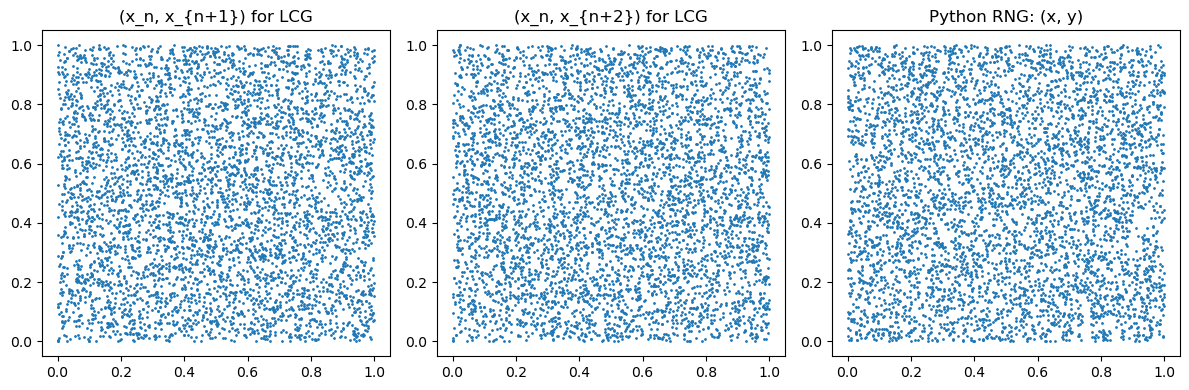

In [17]:
def bad_ng(n, seed=1):
    a = 65539
    m = 2**31
    x = seed
    out = np.zeros(n)
    for i in range(n):
        x = (a * x) % m
        out[i] = x / m     # normalize to [0,1]
    return out

# Generate several thousand samples
vals = bad_ng(5000)

plt.figure(figsize=(12,4))

# Panel 1: (x_n, x_{n+1})
plt.subplot(1,3,1)
plt.scatter(vals[:-1], vals[1:], s=1)
plt.title("(x_n, x_{n+1}) for LCG")

# Panel 2: (x_n, x_{n+2})
plt.subplot(1,3,2)
plt.scatter(vals[:-2], vals[2:], s=1)
plt.title("(x_n, x_{n+2}) for LCG")

# Panel 3: Good RNG
good_x = np.random.random(5000)
good_y = np.random.random(5000)
plt.subplot(1,3,3)
plt.scatter(good_x, good_y, s=1)
plt.title("Python RNG: (x, y)")

plt.tight_layout()
plt.show()

In [20]:
def chi_square(samples, nbins=10):
    counts, _ = np.histogram(samples, bins=nbins, range=(0,1))
    expected = len(samples) / nbins
    chi_value = np.sum((counts - expected)**2 / expected)
    return chi_value, counts

n = 100_000

samples_python = np.array([random.random() for _ in range(n)])
chi_python, counts_python = chi_square(samples_python)

samples_numpy = np.random.random(n)
chi_numpy, counts_numpy = chi_square(samples_numpy)

def bad_ng(n, seed=1):
    a = 65539
    m = 2**31
    x = seed
    out = np.zeros(n)
    for i in range(n):
        x = (a*x) % m
        out[i] = x / m
    return out

samples_ng = bad_ng(n)
chi_ng, counts_ng = chi_square(samples_ng)

print("Python random() chi² =", chi_python)
print("NumPy random() chi²  =", chi_numpy)
print("Bad NG chi²         =", chi_ng)

Python random() chi² = 4.6642
NumPy random() chi²  = 10.239
Bad NG chi²         = 11.6246


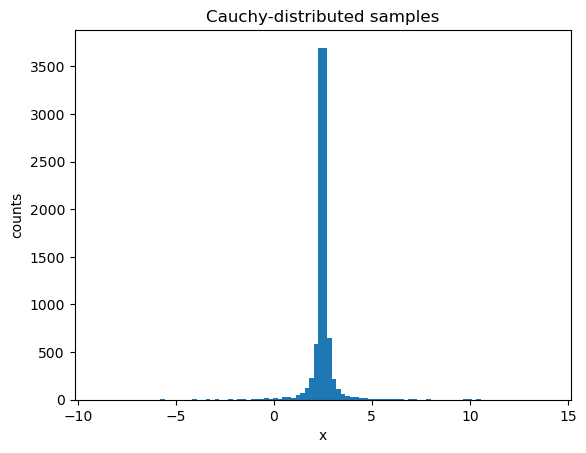

In [26]:
def cauchy_sample(n):
    U = np.random.random(n)
    X = 2.5 + 0.1 * np.tan(np.pi*(U - 0.5))
    return X

# Generate samples
samples = cauchy_sample(10_000)

plt.hist(samples, bins=100, range=(-9,14))
plt.xlabel("x")
plt.ylabel("counts")
plt.title("Cauchy-distributed samples")
plt.show()


# b kinda confused me

In [22]:
def metropolis(nsteps, step_size=1.0):
    x = 1.0
    samples = []

    for i in range(nsteps):
        x_trial = x + step_size*(2*np.random.random() - 1)

        # reject negative x
        if x_trial < 0:
            samples.append(x)
            continue

        # acceptance test
        A = np.exp(-x_trial) / np.exp(-x)
        if np.random.random() < A:
            x = x_trial

        samples.append(x)

    return np.array(samples)

# Run Metropolis, measure every 100 steps
chain = metropolis(1_000_000)
subsampled = chain[::100]

estimate = np.mean(subsampled**2)

print("Metropolis estimate:", estimate)
print("Exact value:        ", 2)

Metropolis estimate: 1.9725042102679515
Exact value:         2
